# 3: Severity Check

In [ ]:
import numpy as np
from numpy import asarray
import os
import pandas as pd
import random
import urllib.request
from IPython.display import Image

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import image
from matplotlib import pyplot
import seaborn as sns
sns.set_style("whitegrid")
from PIL import Image , ImageFont

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import ZeroPadding2D, Dropout 
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16 ,Xception ,ResNet50 ,MobileNet ,DenseNet121 ,EfficientNetB1, VGG19, InceptionV3, mobilenet_v2

## Data Reading

##### Reading damaged cars

In [103]:
list_images_minor= []
name_minor = []
for dirname, _, filenames in os.walk("C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\Minor"):
    for filename in filenames:
        list_images_minor.append(os.path.join(dirname, filename))
        name_minor.append(filename)

> ##### plotting minor damaged cars

In [104]:
list_images_minor

['C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Minor\\0001.JPEG',
 'C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Minor\\0002.JPEG',
 'C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Minor\\0003.JPEG',
 'C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Minor\\0004.JPEG',
 'C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Minor\\0005.JPEG',
 'C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Minor\\0006.JPEG',
 'C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Minor\\0007.JPEG',
 'C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Minor\\0008.JPEG',
 'C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Minor\\0009.JPEG',
 'C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Minor\\0010.JPEG',
 'C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Minor\\0011.JPEG',
 'C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Minor\\0012.JPEG',
 'C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Minor\\0013.JPEG',

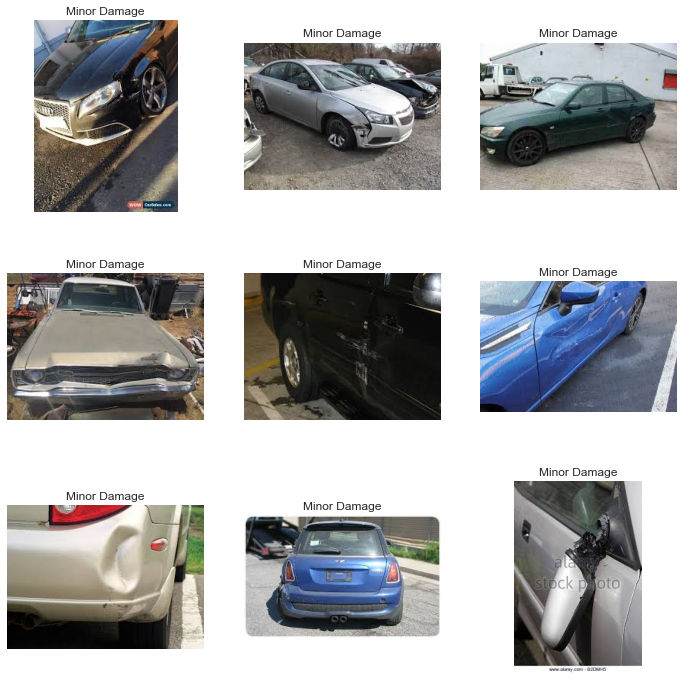

In [105]:
minor = list_images_minor
plt.figure(figsize=(12, 12))
ran_num = []
for i in range(0,9):
    n = random.randint(0,len(minor))
    ran_num.append(n)
for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    plt.imshow(mpimg.imread(minor[ran_num[i]]))
    plt.title("Minor Damage")
    plt.axis("off")

> ##### Saving the minor damaged cars list into a dataframe

In [106]:
df_minor = pd.DataFrame()
df_minor["File_Name"] = name_minor
df_minor["Class"] = "Minor"

In [107]:
df_minor.head()

File_Name  Class
0  0001.JPEG  Minor
1  0002.JPEG  Minor
2  0003.JPEG  Minor
3  0004.JPEG  Minor
4  0005.JPEG  Minor

In [108]:
df_minor.info

<bound method DataFrame.info of      File_Name  Class
0    0001.JPEG  Minor
1    0002.JPEG  Minor
2    0003.JPEG  Minor
3    0004.JPEG  Minor
4    0005.JPEG  Minor
..         ...    ...
321  0322.JPEG  Minor
322  0323.JPEG  Minor
323  0324.JPEG  Minor
324  0325.JPEG  Minor
325  0326.JPEG  Minor

[326 rows x 2 columns]>

##### Reading moderate damaged cars

In [109]:
list_images_moderate= []
name_moderate = []
for dirname, _, filenames in os.walk("C:\\Users\\user\\t5\\PROJECT\\Deep Learning\\Images\\3\\Moderate"):
    for filename in filenames:
        list_images_moderate.append(os.path.join(dirname, filename))
        name_moderate.append(filename)

In [110]:
list_images_moderate

['C:\\Users\\user\\t5\\PROJECT\\Deep Learning\\Images\\3\\Moderate\\0001.JPEG',
 'C:\\Users\\user\\t5\\PROJECT\\Deep Learning\\Images\\3\\Moderate\\0002.JPEG',
 'C:\\Users\\user\\t5\\PROJECT\\Deep Learning\\Images\\3\\Moderate\\0003.JPEG',
 'C:\\Users\\user\\t5\\PROJECT\\Deep Learning\\Images\\3\\Moderate\\0004.JPEG',
 'C:\\Users\\user\\t5\\PROJECT\\Deep Learning\\Images\\3\\Moderate\\0005.JPEG',
 'C:\\Users\\user\\t5\\PROJECT\\Deep Learning\\Images\\3\\Moderate\\0006.JPEG',
 'C:\\Users\\user\\t5\\PROJECT\\Deep Learning\\Images\\3\\Moderate\\0007.JPEG',
 'C:\\Users\\user\\t5\\PROJECT\\Deep Learning\\Images\\3\\Moderate\\0008.JPEG',
 'C:\\Users\\user\\t5\\PROJECT\\Deep Learning\\Images\\3\\Moderate\\0009.JPEG',
 'C:\\Users\\user\\t5\\PROJECT\\Deep Learning\\Images\\3\\Moderate\\0010.JPEG',
 'C:\\Users\\user\\t5\\PROJECT\\Deep Learning\\Images\\3\\Moderate\\0011.JPEG',
 'C:\\Users\\user\\t5\\PROJECT\\Deep Learning\\Images\\3\\Moderate\\0012.JPEG',
 'C:\\Users\\user\\t5\\PROJECT\\Deep Lea

> ##### Plotting moderate damaged cars

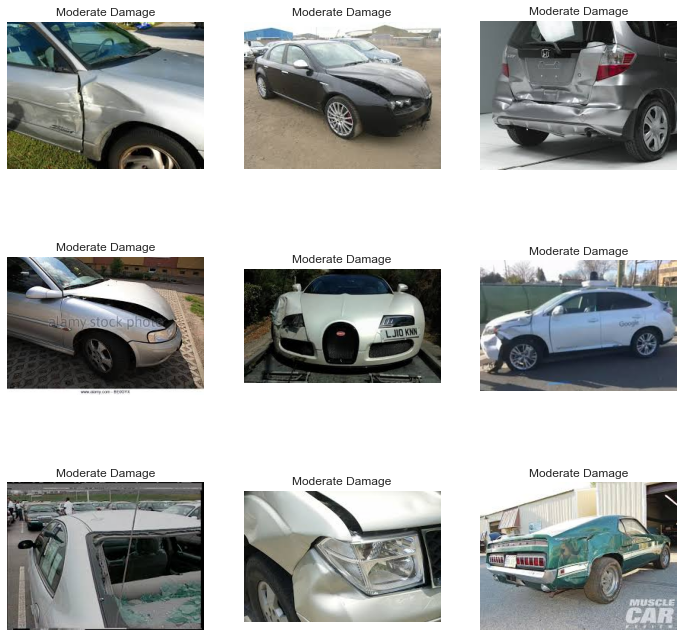

In [111]:
moderate = list_images_moderate
plt.figure(figsize=(12, 12))
ran_num = []
for i in range(0,9):
    n = random.randint(0,len(minor))
    ran_num.append(n)
for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    plt.imshow(mpimg.imread(moderate[ran_num[i]]))
    plt.title("Moderate Damage")
    plt.axis("off")

> ##### Saving the moderate damaged cars list into a dataframe

In [112]:
df_moderate = pd.DataFrame()
df_moderate["File_Name"] = name_moderate
df_moderate["Class"] = "Moderate"

In [113]:
df_moderate.head()

File_Name     Class
0  0001.JPEG  Moderate
1  0002.JPEG  Moderate
2  0003.JPEG  Moderate
3  0004.JPEG  Moderate
4  0005.JPEG  Moderate

In [114]:
df_moderate.info

<bound method DataFrame.info of      File_Name     Class
0    0001.JPEG  Moderate
1    0002.JPEG  Moderate
2    0003.JPEG  Moderate
3    0004.JPEG  Moderate
4    0005.JPEG  Moderate
..         ...       ...
365  0366.JPEG  Moderate
366  0367.JPEG  Moderate
367  0368.JPEG  Moderate
368  0369.JPEG  Moderate
369  0370.JPEG  Moderate

[370 rows x 2 columns]>

##### Reading severe damaged cars

In [115]:
list_images_severe= []
name_severe = []
for dirname, _, filenames in os.walk("C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Severe"):
    for filename in filenames:
        list_images_severe.append(os.path.join(dirname, filename))
        name_severe.append(filename)

In [116]:
list_images_severe

['C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Severe\\0001.JPEG',
 'C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Severe\\0002.JPEG',
 'C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Severe\\0003.JPEG',
 'C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Severe\\0004.JPEG',
 'C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Severe\\0005.JPEG',
 'C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Severe\\0006.JPEG',
 'C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Severe\\0007.JPEG',
 'C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Severe\\0008.JPEG',
 'C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Severe\\0009.JPEG',
 'C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Severe\\0010.JPEG',
 'C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Severe\\0011.JPEG',
 'C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Severe\\0012.JPEG',
 'C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Severe

> ##### Plotting severe damaged cars

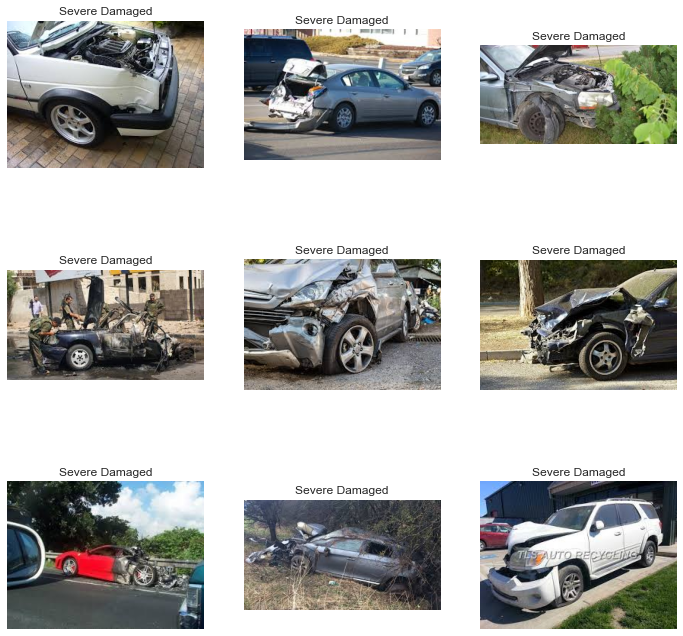

In [117]:
severe = list_images_severe
plt.figure(figsize=(12, 12))
ran_num = []
for i in range(0,9):
    n = random.randint(0,len(severe))
    ran_num.append(n)
for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    plt.imshow(mpimg.imread(severe[ran_num[i]]))
    plt.title("Severe Damaged")
    plt.axis("off")

> ##### Saving the severe damaged cars list into a dataframe

In [118]:
df_severe = pd.DataFrame()
df_severe["File_Name"] = name_severe
df_severe["Class"] = "Severe"

In [119]:
df_severe.head()

File_Name   Class
0  0001.JPEG  Severe
1  0002.JPEG  Severe
2  0003.JPEG  Severe
3  0004.JPEG  Severe
4  0005.JPEG  Severe

In [120]:
df_severe.info

<bound method DataFrame.info of      File_Name   Class
0    0001.JPEG  Severe
1    0002.JPEG  Severe
2    0003.JPEG  Severe
3    0004.JPEG  Severe
4    0005.JPEG  Severe
..         ...     ...
449  0450.JPEG  Severe
450  0451.JPEG  Severe
451  0452.JPEG  Severe
452  0453.JPEG  Severe
453  0454.JPEG  Severe

[454 rows x 2 columns]>

> ##### Now, we will concat the dataframes (Minor & Moderate & Severe) into one dataframe.

In [121]:
df_all = pd.concat([df_minor,df_moderate, df_severe], ignore_index=True)
df_all

File_Name   Class
0     0001.JPEG   Minor
1     0002.JPEG   Minor
2     0003.JPEG   Minor
3     0004.JPEG   Minor
4     0005.JPEG   Minor
...         ...     ...
1145  0450.JPEG  Severe
1146  0451.JPEG  Severe
1147  0452.JPEG  Severe
1148  0453.JPEG  Severe
1149  0454.JPEG  Severe

[1150 rows x 2 columns]

## Preprocessing

In [122]:
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    x = image.img_to_array(img)
    return x

In [123]:
images = []
labels = []
files_path = "C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3"
directory = os.fsencode(files_path)

for folder in os.listdir(directory):
    label = os.fsdecode(folder)
    for img in os.listdir(f'C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\{label}'):
        img_name = os.fsdecode(img)
        images.append(prepare_image(f'C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\{label}\\{img_name}'))
        labels.append(label)

In [124]:
labeling = [int(labels[w].replace('Minor', "0").replace("Moderate",'1').replace("Severe",'2')) for w in range(len(labels))]

In [125]:
X_digits, Y_digits = images, labeling

In [126]:
X = np.array(X_digits)
Y = to_categorical(Y_digits,num_classes=3)

## Data splitting

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .1, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .1111, random_state = 42)

> ##### Shape of each dataframe

In [128]:
X_train.shape

(920, 128, 128, 3)

In [129]:
X_val.shape

(115, 128, 128, 3)

In [130]:
X_test.shape

(115, 128, 128, 3)

## Early stopping, ReduceLROnPlateau, Checkpoint

In [147]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, min_delta=0.001)
lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', verbose=1, patience=2, factor=0.2, min_lr=0.0001)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('severe_best_model.hdf5', monitor='val_accuracy', verbose=1,save_best_only=True,mode='max')

callbacks = [early_stopping, lr_reduction, model_checkpoint]

## Modeling

> ### Simple NN Model

> First try with basic NN model 

In [134]:
NN_01 = Sequential([
                    InputLayer(input_shape = X_train.shape[1:]),
                    Flatten(),
                    Dense(40, activation='relu'),
                    Dense(3, activation='softmax')])

NN_01.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NN_01.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

NN_01_model = NN_01.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_val,y_val))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 49152)             0         
                                                                 
 dense_16 (Dense)            (None, 40)                1966120   
                                                                 
 dense_17 (Dense)            (None, 3)                 123       
                                                                 
Total params: 1,966,243
Trainable params: 1,966,243
Non-trainable params: 0
_________________________________________________________________
 
------------------------------------------------------------------------------
 
Epoch 1/5
29/29 [==============================] - 0s 10ms/step - loss: 1430.8892 - accuracy: 0.3685 - val_loss: 486.6754 - val_accuracy: 0.2870
Epoch 2/5
29/29 [==============================] - 0s 8ms/step - loss: 280.1607 

>> Second try, we will increase the first dense layer to have 500 neural

In [135]:
NN_02 = Sequential([
                    InputLayer(input_shape = X_train.shape[1:]),
                    Flatten(),
                    Dense(500, activation='relu'),
                    Dense(3, activation='softmax')])

NN_02.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NN_02.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

NN_02_model = NN_01.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_val,y_val))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 49152)             0         
                                                                 
 dense_18 (Dense)            (None, 500)               24576500  
                                                                 
 dense_19 (Dense)            (None, 3)                 1503      
                                                                 
Total params: 24,578,003
Trainable params: 24,578,003
Non-trainable params: 0
_________________________________________________________________
 
------------------------------------------------------------------------------
 
Epoch 1/5
29/29 [==============================] - 0s 8ms/step - loss: 143.4554 - accuracy: 0.5728 - val_loss: 231.2717 - val_accuracy: 0.3652
Epoch 2/5
29/29 [==============================] - 0s 8ms/step - loss: 213.0284 

>> Third try, now we will change the activation function from relu to tanh

In [136]:
NN_03 = Sequential([
                    InputLayer(input_shape = X_train.shape[1:]),
                    Flatten(),
                    Dense(500, activation='tanh'),
                    Dense(3, activation='softmax')])

NN_03.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NN_03.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

NN_03_model = NN_01.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_val,y_val))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 49152)             0         
                                                                 
 dense_20 (Dense)            (None, 500)               24576500  
                                                                 
 dense_21 (Dense)            (None, 3)                 1503      
                                                                 
Total params: 24,578,003
Trainable params: 24,578,003
Non-trainable params: 0
_________________________________________________________________
 
------------------------------------------------------------------------------
 
Epoch 1/5
29/29 [==============================] - 0s 9ms/step - loss: 148.4774 - accuracy: 0.5989 - val_loss: 200.2557 - val_accuracy: 0.4348
Epoch 2/5
29/29 [==============================] - 0s 8ms/step - loss: 49.7083 

>> without activation function 

In [137]:
NN_04 = Sequential([
                    InputLayer(input_shape = X_train.shape[1:]),
                    Flatten(),
                    Dense(500),
                    Dense(3, activation='softmax')])

NN_04.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NN_04.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

NN_04_model = NN_01.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_val,y_val))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 49152)             0         
                                                                 
 dense_22 (Dense)            (None, 500)               24576500  
                                                                 
 dense_23 (Dense)            (None, 3)                 1503      
                                                                 
Total params: 24,578,003
Trainable params: 24,578,003
Non-trainable params: 0
_________________________________________________________________
 
------------------------------------------------------------------------------
 
Epoch 1/5
29/29 [==============================] - 0s 8ms/step - loss: 50.8520 - accuracy: 0.7489 - val_loss: 255.4309 - val_accuracy: 0.3826
Epoch 2/5
29/29 [==============================] - 0s 8ms/step - loss: 52.8321 -

>> Fifth try, we will increase the neurals in the dense layer to 1000, using relu as an activation function

In [138]:
NN_05 = Sequential([
                    InputLayer(input_shape = X_train.shape[1:]),
                    Flatten(),
                    Dense(1000, activation='relu'),
                    Dense(3, activation='softmax')])

NN_05.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NN_05.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

NN_05_model = NN_01.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_val,y_val))

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 49152)             0         
                                                                 
 dense_24 (Dense)            (None, 1000)              49153000  
                                                                 
 dense_25 (Dense)            (None, 3)                 3003      
                                                                 
Total params: 49,156,003
Trainable params: 49,156,003
Non-trainable params: 0
_________________________________________________________________
 
------------------------------------------------------------------------------
 
Epoch 1/5
29/29 [==============================] - 0s 9ms/step - loss: 38.9216 - accuracy: 0.8065 - val_loss: 386.9858 - val_accuracy: 0.3739
Epoch 2/5
29/29 [==============================] - 0s 8ms/step - loss: 24.5074 -

>> Sixth try, we will increase the neurals in the dense layer to 1500, using relu as an activation function

In [139]:
NN_06 = Sequential([
                    InputLayer(input_shape = X_train.shape[1:]),
                    Flatten(),
                    Dense(1500, activation='relu'),
                    Dense(3, activation='softmax')])

NN_06.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NN_06.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

NN_06_model = NN_01.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_val,y_val))

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 49152)             0         
                                                                 
 dense_26 (Dense)            (None, 1500)              73729500  
                                                                 
 dense_27 (Dense)            (None, 3)                 4503      
                                                                 
Total params: 73,734,003
Trainable params: 73,734,003
Non-trainable params: 0
_________________________________________________________________
 
------------------------------------------------------------------------------
 
Epoch 1/5
29/29 [==============================] - 0s 9ms/step - loss: 104.0057 - accuracy: 0.6826 - val_loss: 263.3368 - val_accuracy: 0.3391
Epoch 2/5
29/29 [==============================] - 0s 8ms/step - loss: 57.2042 

>> Now, we will try to add more layers

In [140]:
NN_07 = Sequential([
                    InputLayer(input_shape = X_train.shape[1:]),
                    Flatten(),
                    Dense(500, activation='relu'),
                    Dense(250, activation='relu'),
                    Dense(3, activation='softmax')])

NN_07.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NN_07.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

NN_07_model = NN_01.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_val,y_val))

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 49152)             0         
                                                                 
 dense_28 (Dense)            (None, 500)               24576500  
                                                                 
 dense_29 (Dense)            (None, 250)               125250    
                                                                 
 dense_30 (Dense)            (None, 3)                 753       
                                                                 
Total params: 24,702,503
Trainable params: 24,702,503
Non-trainable params: 0
_________________________________________________________________
 
------------------------------------------------------------------------------
 
Epoch 1/5
29/29 [==============================] - 0s 9ms/step - loss: 16.9537 - accuracy:

>> Adding more layers too

In [141]:
NN_08 = Sequential([
                    InputLayer(input_shape = X_train.shape[1:]),
                    Flatten(),
                    Dense(500, activation='relu'),
                    Dense(250, activation='relu'),
                    Dense(125, activation='relu'),
                    Dense(75, activation='relu'),
                    Dense(3, activation='softmax')])

NN_08.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NN_08.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

NN_08_model = NN_01.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_val,y_val))

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 49152)             0         
                                                                 
 dense_31 (Dense)            (None, 500)               24576500  
                                                                 
 dense_32 (Dense)            (None, 250)               125250    
                                                                 
 dense_33 (Dense)            (None, 125)               31375     
                                                                 
 dense_34 (Dense)            (None, 75)                9450      
                                                                 
 dense_35 (Dense)            (None, 3)                 228       
                                                                 
Total params: 24,742,803
Trainable params: 24,742,803

>> #### We tried with NN model, eight times

> ### CNN model

>> First, we will try CNN model without dropout

In [142]:
CNN_01 = Sequential([
                     InputLayer(input_shape=X_train.shape[1:]),
                     Conv2D(filters=16, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(500, activation='relu'),
                     Dense(3, activation='softmax')])

CNN_01.compile(loss='categorical_crossentropy',
              optimizer='adam',
              
              metrics=['accuracy'])

CNN_01.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

CNN_01_model = CNN_01.fit(X_train, y_train, epochs=10, verbose=1,  validation_data=(X_val,y_val))

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten_16 (Flatten)        (None, 32768)             0         
                                                                 
 dense_36 (Dense)            (None, 500)             

>> CNN with dropout only 5%

In [143]:
CNN_02 = Sequential([
                     InputLayer(input_shape=X_train.shape[1:]),
                     Conv2D(filters=16, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(500, activation='relu'),
                     Dropout(0.05),
                     Dense(3, activation='softmax')])

CNN_02.compile(loss='categorical_crossentropy',
              optimizer='adam',
              
              metrics=['accuracy'])

CNN_02.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

CNN_02_model = CNN_01.fit(X_train, y_train, epochs=10, verbose=1,  validation_data=(X_val,y_val))

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 128, 16)      1216      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        12832     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten_17 (Flatten)        (None, 32768)             0         
                                                                 
 dense_38 (Dense)            (None, 500)             

>> CNN with a regularizer

In [144]:
CNN_03 = Sequential([
                     InputLayer(input_shape=X_train.shape[1:]),
                     Conv2D(filters=32, 
                            kernel_size=5, 
                            activation='relu', 
                            padding='same',
                            kernel_regularizer=keras.regularizers.l2(0.001)),
                     MaxPooling2D(),
                     Conv2D(filters=64, 
                            kernel_size=5, 
                            activation='relu', 
                            padding='same', 
                            kernel_regularizer=keras.regularizers.l2(0.001)),
                     MaxPooling2D(),
                     Conv2D(filters=128, 
                            kernel_size=5, 
                            activation='relu', 
                            padding='same', 
                            kernel_regularizer=keras.regularizers.l2(0.001)),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(512, 
                           activation='relu', 
                           kernel_regularizer=keras.regularizers.l2(0.001)),
                     Dense(3, activation='softmax')])

CNN_03.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

CNN_03.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

CNN_03_model = CNN_03.fit(X_train, y_train, epochs=10, verbose=1,  validation_data=(X_val,y_val))

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       204928    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 128)    

>> CNN with more dense layers and droputs

In [145]:
CNN_04 = Sequential([
                     InputLayer(input_shape=X_train.shape[1:]),
                     Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=64, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=128, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(256, activation='relu'),
                     Dropout(0.05),
                     Dense(512, activation='relu'),
                     Dropout(0.05),
                     Dense(3, activation='softmax')])

CNN_04.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

CNN_04.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

CNN_04_model = CNN_04.fit(X_train, y_train, epochs=10, verbose=1, batch_size=300, validation_data=(X_val,y_val))

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 64)        51264     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 128)       204928    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 128)    

>> Using Early stopping, ReduseLROnPlataeu, checkpoint

In [146]:
CNN_05 = Sequential([
                     InputLayer(input_shape=X_train.shape[1:]),
                     Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=64, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=128, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(256, activation='relu'),
                     Dropout(0.05),
                     Dense(512, activation='relu'),
                     Dropout(0.05),
                     Dense(3, activation='softmax')])

CNN_05.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

CNN_05.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 64)        51264     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 128)       204928    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 128)    

In [148]:
CNN_05_model = CNN_05.fit(X_train, y_train, epochs=30, verbose=1, batch_size=128, validation_data=(X_val,y_val), callbacks=callbacks)


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 222.5429 - accuracy: 0.3641
Epoch 00001: val_accuracy improved from -inf to 0.35652, saving model to severe_best_model.hdf5
8/8 [==============================] - 14s 2s/step - loss: 222.5429 - accuracy: 0.3641 - val_loss: 1.2159 - val_accuracy: 0.3565 - lr: 0.0010
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 1.1272 - accuracy: 0.3565
Epoch 00002: val_accuracy did not improve from 0.35652
8/8 [==============================] - 13s 2s/step - loss: 1.1272 - accuracy: 0.3565 - val_loss: 1.0928 - val_accuracy: 0.3391 - lr: 0.0010
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 1.0825 - accuracy: 0.4359
Epoch 00003: val_accuracy improved from 0.35652 to 0.36522, saving model to severe_best_model.hdf5
8/8 [==============================] - 13s 2s/step - loss: 1.0825 - accuracy: 0.4359 - val_loss: 1.1038 - val_accuracy: 0.3652 - lr: 0.0010
Epoch 4/30
8/8 [==============================] - 

> #### We used dropout and keras regularizer and still... we have an overfitting in our data. 

## Transfer Learning

> #### VGG16

In [152]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))

#Freeze convolutional layers
for layer in vgg_model.layers:
    layer.trainable = False
    
x = vgg_model.output
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(50, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

vgg_model = Model(inputs = vgg_model.input, outputs=predictions)
vgg_model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [153]:
vgg_16 = vgg_model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=20, callbacks=callbacks)

Epoch 1/20
29/29 [==============================] - ETA: 0s - loss: 8.6065 - accuracy: 0.4293
Epoch 00001: val_accuracy improved from 0.41739 to 0.44348, saving model to severe_best_model.hdf5
29/29 [==============================] - 23s 769ms/step - loss: 8.6065 - accuracy: 0.4293 - val_loss: 2.4636 - val_accuracy: 0.4435 - lr: 0.0010
Epoch 2/20
29/29 [==============================] - ETA: 0s - loss: 2.4782 - accuracy: 0.5511
Epoch 00002: val_accuracy did not improve from 0.44348
29/29 [==============================] - 23s 785ms/step - loss: 2.4782 - accuracy: 0.5511 - val_loss: 1.3959 - val_accuracy: 0.4087 - lr: 0.0010
Epoch 3/20
29/29 [==============================] - ETA: 0s - loss: 1.0771 - accuracy: 0.5685
Epoch 00003: val_accuracy did not improve from 0.44348
29/29 [==============================] - 22s 758ms/step - loss: 1.0771 - accuracy: 0.5685 - val_loss: 1.2004 - val_accuracy: 0.4435 - lr: 0.0010
Epoch 4/20
29/29 [==============================] - ETA: 0s - loss: 1.0019

>> ##### plotting for VGG16 (accuracy & loss)

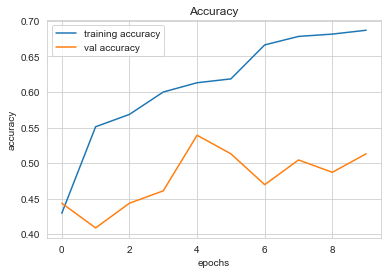

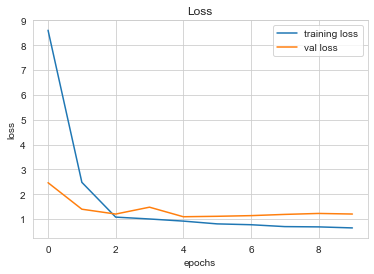

In [154]:
plt.figure(0)
plt.plot(vgg_16.history['accuracy'], label='training accuracy')
plt.plot(vgg_16.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure(1)
plt.plot(vgg_16.history['loss'], label='training loss')
plt.plot(vgg_16.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

# Data Augmentation

In [161]:
datagen = ImageDataGenerator(
    rotation_range = 40, 
    width_shift_range = 0.1,
    height_shift_range = 0.1, 
    brightness_range = (0.5, 1),
    shear_range=0.2,
    zoom_range = 0.2,
    horizontal_flip = True, 
    fill_mode='nearest')

> plotting an example of augmented image

Found 1 validated image filenames belonging to 1 classes.


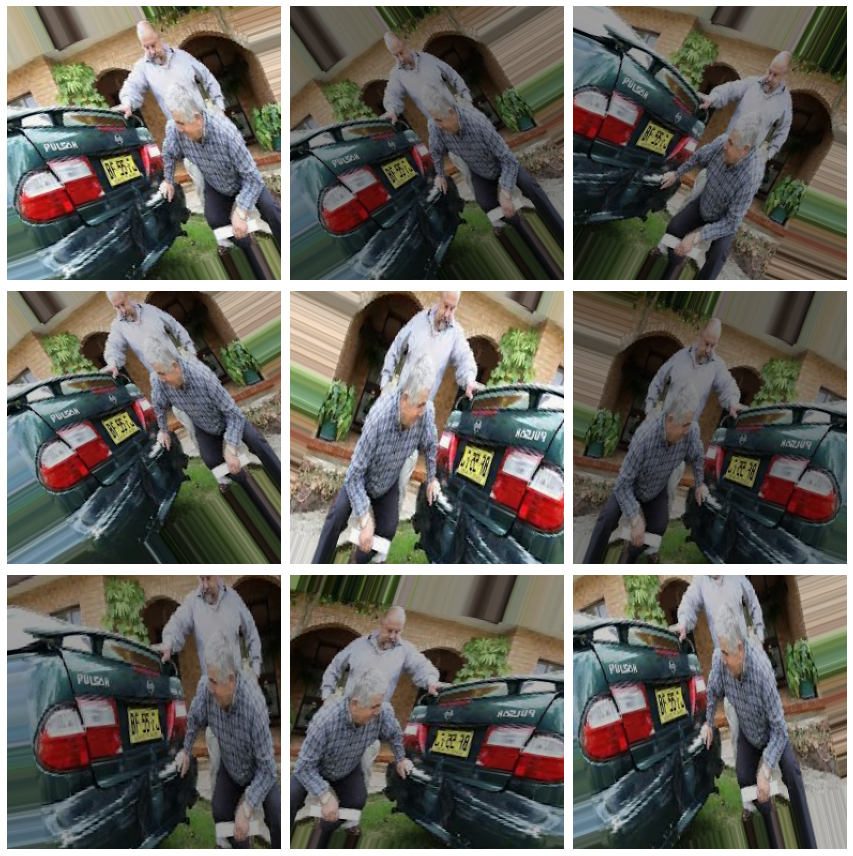

In [162]:
sample_df = df_minor.sample(1)
sample_generator = datagen.flow_from_dataframe(
    dataframe = sample_df,
    directory = 'Images\\3\\minor',
    x_col = "File_Name",
    y_col = "Class")

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    for X, y in sample_generator:
        plt.imshow(X[0]/255)
        plt.axis("off")
        break
plt.tight_layout()
plt.show()

In [177]:
Sample_list_minor = random.sample(list_images_minor, 326)
Sample_list_moderate = random.sample(list_images_moderate, 370)
Sample_list_severe = random.sample(list_images_severe, 454)

> Saving the images

In [181]:
for path in Sample_list_minor:
    img = load_img(path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,save_to_dir='C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Minor', save_prefix='minor', save_format='jpg'):
        i += 1
        if i > 4:
            break
            

for path in Sample_list_moderate:
    img = load_img(path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,save_to_dir='C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Moderate', save_prefix='moderate', save_format='jpg'):
        i += 1
        if i > 4:
            break


for path in Sample_list_severe:
    img = load_img(path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,save_to_dir='C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Severe', save_prefix='severe', save_format='jpg'):
        i += 1
        if i > 4:
            break

In [183]:
list_images_minor_Aug = []
name_minor_Aug= []
for dirname, _, filenames in os.walk("C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Minor"):
    for filename in filenames:
        list_images_minor_Aug.append(os.path.join(dirname, filename))
        name_minor_Aug.append(filename)

df_images_minor_Aug = pd.DataFrame()
df_images_minor_Aug["File_Name"] = name_minor_Aug
df_images_minor_Aug["Class"] = "minor"
df_images_minor_Aug

File_Name  Class
0            0001.JPEG  minor
1            0002.JPEG  minor
2            0003.JPEG  minor
3            0004.JPEG  minor
4            0005.JPEG  minor
...                ...    ...
1827  minor_0_9977.jpg  minor
1828  minor_0_9978.jpg  minor
1829  minor_0_9986.jpg  minor
1830  minor_0_9989.jpg  minor
1831  minor_0_9997.jpg  minor

[1832 rows x 2 columns]

In [185]:
list_images_moderate_Aug = []
name_moderate_Aug= []
for dirname, _, filenames in os.walk("C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Moderate"):
    for filename in filenames:
        list_images_moderate_Aug.append(os.path.join(dirname, filename))
        name_moderate_Aug.append(filename)

df_images_moderate_Aug = pd.DataFrame()
df_images_moderate_Aug["File_Name"] = name_moderate_Aug
df_images_moderate_Aug["Class"] = "moderate"
df_images_moderate_Aug

File_Name     Class
0               0001.JPEG  moderate
1               0002.JPEG  moderate
2               0003.JPEG  moderate
3               0004.JPEG  moderate
4               0005.JPEG  moderate
...                   ...       ...
2045  moderate_0_9951.jpg  moderate
2046  moderate_0_9955.jpg  moderate
2047  moderate_0_9958.jpg  moderate
2048  moderate_0_9985.jpg  moderate
2049  moderate_0_9996.jpg  moderate

[2050 rows x 2 columns]

In [186]:
list_images_severe_Aug = []
name_severe_Aug= []
for dirname, _, filenames in os.walk("C:\\Users\\user\\T5\\PROJECT\\Deep Learning\\Images\\3\\Severe"):
    for filename in filenames:
        list_images_severe_Aug.append(os.path.join(dirname, filename))
        name_severe_Aug.append(filename)

df_images_severe_Aug = pd.DataFrame()
df_images_severe_Aug["File_Name"] = name_severe_Aug
df_images_severe_Aug["Class"] = "severe"
df_images_severe_Aug

File_Name   Class
0             0001.JPEG  severe
1             0002.JPEG  severe
2             0003.JPEG  severe
3             0004.JPEG  severe
4             0005.JPEG  severe
...                 ...     ...
2453  severe_0_9971.jpg  severe
2454  severe_0_9972.jpg  severe
2455  severe_0_9980.jpg  severe
2456  severe_0_9991.jpg  severe
2457  severe_0_9999.jpg  severe

[2458 rows x 2 columns]

In [187]:
df_all_images_Aug = pd.concat([df_images_minor_Aug, df_images_moderate_Aug,df_images_severe_Aug], ignore_index=True)
df_all_images_Aug

File_Name   Class
0             0001.JPEG   minor
1             0002.JPEG   minor
2             0003.JPEG   minor
3             0004.JPEG   minor
4             0005.JPEG   minor
...                 ...     ...
6335  severe_0_9971.jpg  severe
6336  severe_0_9972.jpg  severe
6337  severe_0_9980.jpg  severe
6338  severe_0_9991.jpg  severe
6339  severe_0_9999.jpg  severe

[6340 rows x 2 columns]

In [191]:
images_Aug = []
labels_Aug = []
files_path = "C:/Users/user/T5/PROJECT/Deep Learning/Images/3"
directory = os.fsencode(files_path)

for folder in os.listdir(directory):
    label = os.fsdecode(folder)
    for img in os.listdir(f'C:/Users/user/T5/PROJECT/Deep Learning/Images/3/{label}'):
        img_name = os.fsdecode(img)
        images_Aug.append(prepare_image(f'C:/Users/user/T5/PROJECT/Deep Learning/Images/3/{label}/{img_name}'))
        labels_Aug.append(label)


In [195]:
label_0_1_Aug = [int(labels_Aug[w].replace('Minor', "0").replace("Moderate",'1').replace("Severe",'2')) for w in range(len(labels_Aug))]
label_0_1_Aug

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [197]:
X_digits_Aug, Y_digits_Aug = images_Aug, label_0_1_Aug

In [198]:
X_Aug = np.array(X_digits_Aug)
Y_Aug = to_categorical(Y_digits_Aug, num_classes=3)

In [199]:
X_Aug.shape, Y_Aug.shape

((6340, 128, 128, 3), (6340, 3))

In [200]:
X_train_val, X_test, y_train_val, y_test = (train_test_split(X_Aug, Y_Aug, test_size = .1, random_state = 42))
X_train, X_val, y_train, y_val = (train_test_split(X_train_val, y_train_val, test_size = .111, random_state = 42))

In [201]:
X_train.shape

(5072, 128, 128, 3)

In [202]:
X_val.shape

(634, 128, 128, 3)

In [203]:
X_test.shape

(634, 128, 128, 3)

> #### VGG19

In [156]:
vgg_model_19 = VGG19(weights='imagenet', include_top=False, input_shape=(128,128,3))

#Freeze convolutional layers
for layer in vgg_model_19.layers:
    layer.trainable = False
    
x = vgg_model_19.output
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(50, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

vgg_model_19 = Model(inputs = vgg_model_19.input, outputs=predictions)
vgg_model_19.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
vgg_model_19.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [204]:
vgg_19 = vgg_model_19.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=20, callbacks=callbacks)

Epoch 1/20
159/159 [==============================] - ETA: 0s - loss: 0.9475 - accuracy: 0.5493
Epoch 00001: val_accuracy did not improve from 0.61957
159/159 [==============================] - 143s 898ms/step - loss: 0.9475 - accuracy: 0.5493 - val_loss: 0.7518 - val_accuracy: 0.5543 - lr: 2.0000e-04
Epoch 2/20
159/159 [==============================] - ETA: 0s - loss: 0.8845 - accuracy: 0.5765
Epoch 00002: val_accuracy did not improve from 0.61957
159/159 [==============================] - 145s 909ms/step - loss: 0.8845 - accuracy: 0.5765 - val_loss: 0.6990 - val_accuracy: 0.6196 - lr: 2.0000e-04
Epoch 3/20
159/159 [==============================] - ETA: 0s - loss: 0.8283 - accuracy: 0.6002
Epoch 00003: val_accuracy improved from 0.61957 to 0.67391, saving model to severe_best_model.hdf5
159/159 [==============================] - 142s 892ms/step - loss: 0.8283 - accuracy: 0.6002 - val_loss: 0.6401 - val_accuracy: 0.6739 - lr: 2.0000e-04
Epoch 4/20
159/159 [===========================

>> ##### plotting for VGG19 (accuracy & loss)

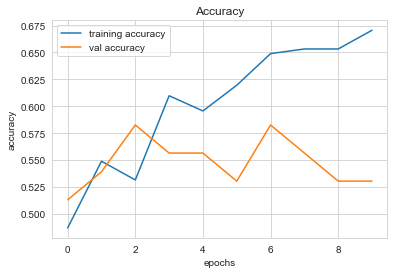

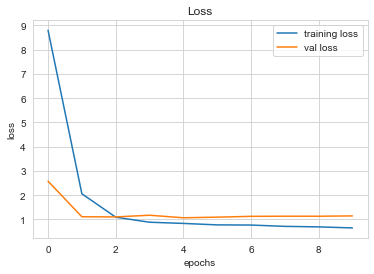

In [ ]:
plt.figure(0)
plt.plot(vgg_19.history['accuracy'], label='training accuracy')
plt.plot(vgg_19.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure(1)
plt.plot(vgg_19.history['loss'], label='training loss')
plt.plot(vgg_19.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

> #### InceptionV3

In [ ]:
Incep_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128,128,3))

#Freeze convolutional layers
for layer in Incep_model.layers:
    layer.trainable = False
    
x = Incep_model.output
x = Flatten()(x)
x = Dense(200, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(100, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

Incep_model = Model(inputs = Incep_model.input, outputs=predictions)
Incep_model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
Incep_model.summary()

87924736/87910968 [==============================] - 4s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_16 (Conv2D)             (None, 63, 63, 32)   864         ['input_17[0][0]']               
                                                                                                  
 batch_normalization (BatchNorm  (None, 63, 63, 32)  96          ['conv2d_16[0][0]']              
 alization)                                                                                       
                           

In [ ]:
incep = Incep_model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=20, callbacks=callbacks)

Epoch 1/20
29/29 [==============================] - ETA: 0s - loss: 91.9908 - accuracy: 0.3717
Epoch 00001: val_accuracy did not improve from 0.58261
29/29 [==============================] - 17s 467ms/step - loss: 91.9908 - accuracy: 0.3717 - val_loss: 17.8910 - val_accuracy: 0.4783 - lr: 0.0010
Epoch 2/20
29/29 [==============================] - ETA: 0s - loss: 16.5468 - accuracy: 0.4370
Epoch 00002: val_accuracy did not improve from 0.58261
29/29 [==============================] - 12s 424ms/step - loss: 16.5468 - accuracy: 0.4370 - val_loss: 1.6422 - val_accuracy: 0.4696 - lr: 0.0010
Epoch 3/20
29/29 [==============================] - ETA: 0s - loss: 1.2132 - accuracy: 0.3370
Epoch 00003: val_accuracy did not improve from 0.58261
29/29 [==============================] - 13s 441ms/step - loss: 1.2132 - accuracy: 0.3370 - val_loss: 1.0848 - val_accuracy: 0.3739 - lr: 0.0010
Epoch 4/20
29/29 [==============================] - ETA: 0s - loss: 1.1148 - accuracy: 0.4250
Epoch 00004: val_ac

>> ##### plotting for InceptionV3 (accuracy & loss)

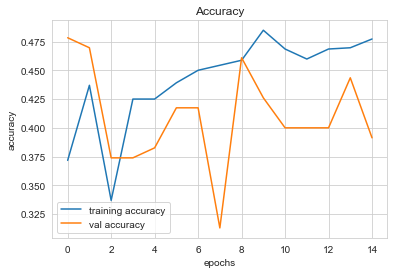

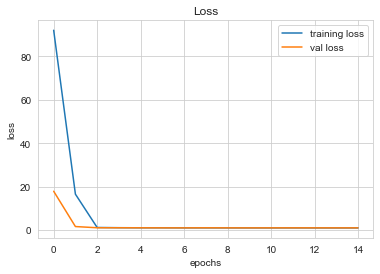

In [ ]:
plt.figure(0)
plt.plot(incep.history['accuracy'], label='training accuracy')
plt.plot(incep.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure(1)
plt.plot(incep.history['loss'], label='training loss')
plt.plot(incep.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

> #### MobileNetV2

In [ ]:
mn2_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3))

#Freeze convolutional layers
for layer in mn2_model.layers:
    layer.trainable = False
    
x = mn2_model.output
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(50, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

mn2_model = Model(inputs = mn2_model.input, outputs=predictions)
mn2_model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
mn2_model.summary()

9420800/9406464 [==============================] - 1s 0us/step
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_18[0][0]']               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)           

 block_6_expand_BN (BatchNormal  (None, 16, 16, 192)  768        ['block_6_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_6_expand_relu (ReLU)     (None, 16, 16, 192)  0           ['block_6_expand_BN[0][0]']      
                                                                                                  
 block_6_pad (ZeroPadding2D)    (None, 17, 17, 192)  0           ['block_6_expand_relu[0][0]']    
                                                                                                  
 block_6_depthwise (DepthwiseCo  (None, 8, 8, 192)   1728        ['block_6_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_6_d

In [ ]:
mobilev2 = mn2_model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=20, callbacks=callbacks)

Epoch 1/20
29/29 [==============================] - ETA: 0s - loss: 2.2317 - accuracy: 0.3783
Epoch 00001: val_accuracy did not improve from 0.58261
29/29 [==============================] - 8s 213ms/step - loss: 2.2317 - accuracy: 0.3783 - val_loss: 1.1206 - val_accuracy: 0.3826 - lr: 0.0010
Epoch 2/20
29/29 [==============================] - ETA: 0s - loss: 1.1045 - accuracy: 0.3761
Epoch 00002: val_accuracy did not improve from 0.58261
29/29 [==============================] - 6s 191ms/step - loss: 1.1045 - accuracy: 0.3761 - val_loss: 1.0667 - val_accuracy: 0.4174 - lr: 0.0010
Epoch 3/20
29/29 [==============================] - ETA: 0s - loss: 1.0419 - accuracy: 0.3728
Epoch 00003: val_accuracy did not improve from 0.58261
29/29 [==============================] - 6s 192ms/step - loss: 1.0419 - accuracy: 0.3728 - val_loss: 1.0746 - val_accuracy: 0.4000 - lr: 0.0010
Epoch 4/20
29/29 [==============================] - ETA: 0s - loss: 1.0257 - accuracy: 0.4500
Epoch 00004: val_accuracy d

>> ##### plotting for MobileNetV2 (accuracy & loss)

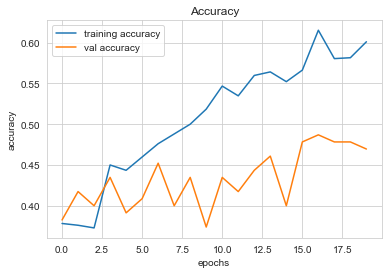

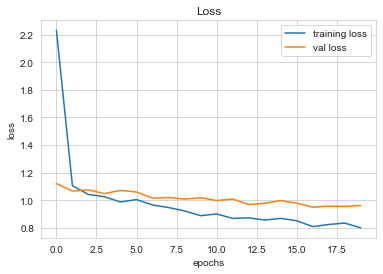

In [ ]:
plt.figure(0)
plt.plot(mobilev2.history['accuracy'], label='training accuracy')
plt.plot(mobilev2.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure(1)
plt.plot(mobilev2.history['loss'], label='training loss')
plt.plot(mobilev2.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

### Loading the best model

In [211]:
from keras.models import load_model
ft_model = load_model('severe_best_model.hdf5')

### test our model

In [214]:
print('Accuracy of our model on test data: ', ft_model.evaluate(X_test,y_test)[1]*100,'%')

20/20 [==============================] - 20s 980ms/step - loss: 0.6521 - accuracy: 0.7350
Accuracy of our model on test data:  73.50157499313354 %


## build a pipe for severity check

In [212]:
def severity(image_path, model):
    urllib.request.urlretrieve(image_path, 'save.jpg')
    img = load_img('save.jpg', target_size=(128,128))
    x = img_to_array(img)
    x = x.reshape((1,)+x.shape)/255
    pred = model.predict(x)
    pred_labels = np.argmax(pred, axis=1)
    d = {0:'minor', 1:'moderate', 2:'severe'}
    for key in d.keys():
        if pred_labels[0] == key:
            print("Validating severity of damage....Result:",d[key])
    print("Severity assessment complete.")

## Try our model with damaged car for severity check

In [217]:
severity('https://image.shutterstock.com/image-photo/zaporozhye-ukraine-november-12-2019-600w-1912770286.jpg', ft_model)

Validating severity of damage....Result: moderate
Severity assessment complete.
